<a href="https://colab.research.google.com/github/2303A51469/GENERATIVE-AI_2025/blob/main/2303A52431_WEEK_7_ASSIGNMENT_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

1. (1 ponto) Design a multilayer ANN architecture according to the requirements shown below.
Train, test, save (.h5) and deploy the model to diagnose diabatic disease using the Keras deep
learning library

2. (1 ponto) Calculate training and testing accuracy, build confusion matrix, also calculate recall,
precision and F1-score.

3. (1 ponto) Build the application by loading the saved ANN model.
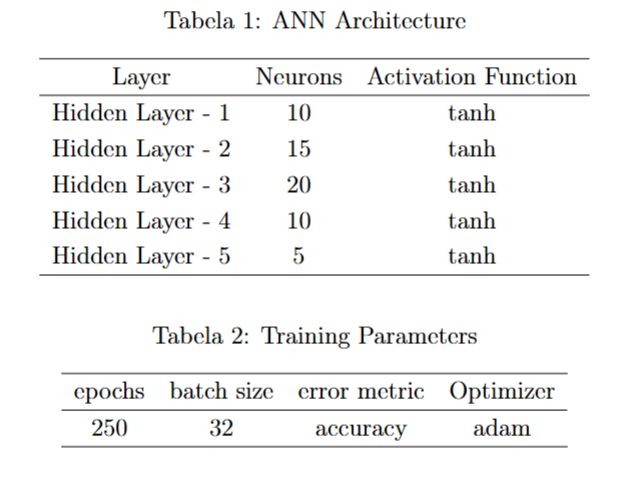

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Generate sample dataset (replace with actual diabetes dataset)
X_train = np.random.rand(500, 10)  # 500 samples, 10 features
y_train = np.random.randint(0, 2, (500, 1))  # Binary classification (0 or 1)

X_test = np.random.rand(100, 10)
y_test = np.random.randint(0, 2, (100, 1))

# Define the model
model = Sequential([
    Dense(10, activation='tanh', input_shape=(10,)),
    Dense(15, activation='tanh'),
    Dense(20, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(5, activation='tanh'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save("diabetes_model.h5")

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Predict and calculate metrics
y_pred = (model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Load and deploy the model
loaded_model = keras.models.load_model("diabetes_model.h5")

# Predict for new data
new_data = np.random.rand(1, 10)  # Example new input
predicted_result = loaded_model.predict(new_data)

print("Predicted Disease (0: No, 1: Yes):", int(predicted_result[0][0] > 0.5))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.5008 - loss: 0.7304 - val_accuracy: 0.6300 - val_loss: 0.6703
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4620 - loss: 0.7245 - val_accuracy: 0.6100 - val_loss: 0.6787
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5073 - loss: 0.7013 - val_accuracy: 0.5300 - val_loss: 0.6891
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4934 - loss: 0.6993 - val_accuracy: 0.5100 - val_loss: 0.6938
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5495 - loss: 0.6936 - val_accuracy: 0.4600 - val_loss: 0.6985
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5736 - loss: 0.6879 - val_accuracy: 0.4800 - val_loss: 0.7009
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5092 - loss: 0.6937 - val_accuracy: 0.4500 - val_loss: 0.7060
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5622 - loss: 0.6862 - val_accuracy: 0

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6940 - loss: 0.5843 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5300 - loss: 0.7376 
Train Accuracy: 0.6679999828338623
Test Accuracy: 0.5099999904632568
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Confusion Matrix:
 [[30 23]
 [26 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.57      0.55        53
           1       0.48      0.45      0.46        47

    accuracy                           0.51       100
   macro avg       0.51      0.51      0.51       100
weighted avg       0.51      0.51      0.51       100



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Disease (0: No, 1: Yes): 1
